In [1072]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import glob
sns.set_style('whitegrid')

import scipy.signal as sig

from preproc_6ax_data import load_and_preproc_data_batch

In [1]:
!ls /home/asya/Desktop/Gyro_Data/bluepy_data/silks_preproc
#df.query('t > 65.546 and t <76.546')

0722_2salto_pancake_preproc.txt
0722_hipkey_layout_salto_nopancake_preproc.txt
0722_wheeldown_preproc.txt
0723_3_salto_nopancake_preproc.txt
0723_3_salto_pancake_preproc.txt
0723_wheeldown_preproc.txt
0726_1_backbalance_flag_b_preproc.txt
0726_1_backbalance_flag_c_preproc.txt
0726_1_backbalance_flag_preproc.txt
0726_3circus_climb_preproc.txt
0726_3salto_nopancake_preproc.txt
0726_hipkey_spin_preproc.txt
0726_warm_up_a_preproc.txt
0726_wheeldown_2_preproc.txt
0726_wheeldown_3_preproc.txt
0726_wheeldown_4bad_preproc.txt
0726_wheeldown_preproc.txt
0727_3salto_nopancake_preproc.txt
0727_3salto_pancake_preproc.txt
0727_back-balance_flag_preproc.txt
0727_hipkey_spin_layout_preproc.txt
0727_wheeldown_2_preproc.txt
0727_wheeldown_preproc.txt
0729_1salto_pancake_2_nopancake_preproc.txt
0729_3salto_pancake_preproc.txt
circus_climb_preproc.txt
leg_key_climb1_preproc.txt


In [1150]:
df, b1_press_t, b2_press_t = load_and_preproc_data_batch('silks_preproc/*salto_pancake*')

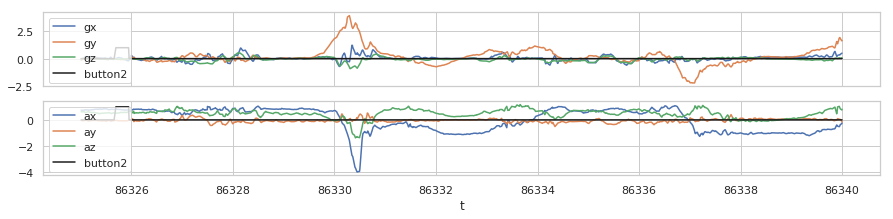

In [1180]:
#df_clip = df.query('t > {} and t <{}'.format(0, 1e3))
#df_clip = df.query('t > {} and t <{}'.format(1e3, 9e4))
#df_clip = df.query('t > {} and t <{}'.format(86300, 9e4))
df_clip = df.query('t > {} and t <{}'.format(86330-5, 86330+10))
fig, ax = plt.subplots(2,1, sharex = True, figsize = (15,3))

df_clip.gx.plot(ax = ax[0], legend = 'gx')
df_clip.gy.plot(ax = ax[0], legend = 'gy')
df_clip.gz.plot(ax = ax[0], legend = 'gz')
df_clip.button2.plot(ax = ax[0], legend = 'button', color = 'k')

df_clip.ax.plot(ax = ax[1], legend = 'ax')
df_clip.ay.plot(ax = ax[1], legend = 'ay')
df_clip.az.plot(ax = ax[1], legend = 'az')
df_clip.button2.plot(ax = ax[1], legend = 'button', color = 'k')

In [1178]:
df, b1_press_t, b2_press_t = load_and_preproc_data('silks_preproc/*salto_pancake*')
df.loc[df.ax_medfilt<-3]

,index,rec_time,button,gx,gy,gz,ax,ay,az,button1,button2,rec_time_ms,index_medfilt,gx_medfilt,gy_medfilt,gz_medfilt,ax_medfilt,ay_medfilt,az_medfilt
t,,,,,,,,,,,,,,,,,,,
86330.394,13.848,1.595549e+09,3,0.661,3.040,-0.685,-3.450,0.013,-1.181,0,0,86330429.0,13.848,0.409,3.040,-0.773,-3.334,0.066,-1.156
86330.404,13.849,1.595549e+09,3,0.557,3.160,-0.676,-3.638,-0.037,-1.298,0,0,86330429.0,13.849,0.410,2.932,-0.773,-3.334,0.067,-1.156
86330.413,13.850,1.595549e+09,3,0.409,3.274,-0.707,-3.693,-0.029,-1.382,0,0,86330430.0,13.850,0.534,2.877,-0.707,-3.334,0.073,-1.156
86330.444,13.851,1.595549e+09,3,0.410,3.069,-0.860,-3.994,0.171,-1.282,0,0,86330431.0,13.851,0.557,2.822,-0.685,-3.334,0.088,-1.156
86330.448,13.852,1.595549e+09,3,0.534,2.877,-0.883,-4.000,0.066,-1.312,0,0,86330479.0,13.852,0.557,2.764,-0.676,-3.334,0.066,-1.156
86330.494,13.853,1.595549e+09,3,0.256,2.489,-0.521,-3.951,0.413,-1.369,0,0,86330479.0,13.853,0.534,2.489,-0.521,-3.334,0.066,-1.156
86330.500,13.854,1.595549e+09,3,0.293,2.361,-0.487,-3.768,0.428,-1.250,0,0,86330480.0,13.854,0.414,2.361,-0.487,-3.334,0.066,-1.156
86330.509,13.855,1.595549e+09,3,0.330,2.241,-0.412,-3.334,0.448,-1.156,0,0,86330529.0,13.855,0.410,2.241,-0.412,-3.334,0.088,-1.156


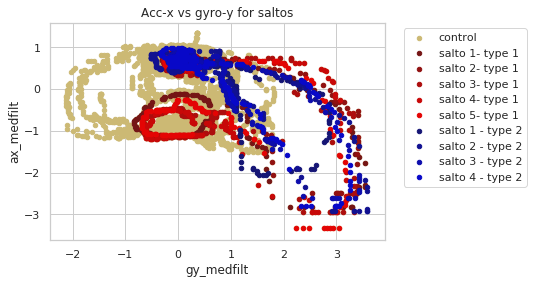

In [1185]:
fig, ax = plt.subplots()
df, b1_press_t, b2_press_t = load_and_preproc_data('silks_preproc/*salto_pancake*')
df.plot.scatter(ax = ax, x = 'gy_medfilt', y = 'ax_medfilt', color = 'y', label = 'control')

cols = sns.dark_palette("red",n_colors=9)
for i, t_start in enumerate(b2_press_t):
    df_clip = df.query('t > {} and t <{}'.format(t_start, t_start+7))
    df_clip.plot.scatter(ax = ax, x = 'gy_medfilt', y = 'ax_medfilt',c = [cols[i+3]], label = 'salto {}- type 1'.format(i+1))
    

df, b1_press_t, b2_press_t = load_and_preproc_data('silks_preproc/*salto_nopancake*')
cols = sns.dark_palette("blue",n_colors=9)
for i, t_start in enumerate(b2_press_t):
    df_clip = df.query('t > {} and t <{}'.format(t_start, t_start+7))
    df_clip.plot.scatter(ax = ax, x = 'gy_medfilt', y = 'ax_medfilt',c = [cols[i+3]], label = 'salto {} - type 2'.format(i+1))
    

plt.title('Acc-x vs gyro-y for saltos')
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


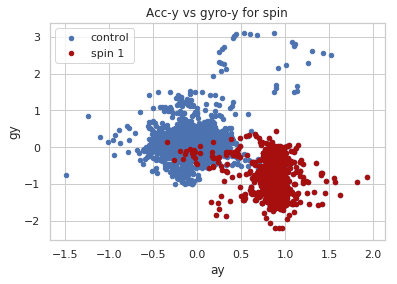

In [1071]:
fig, ax = plt.subplots()
df.plot.scatter(ax = ax, x = 'ay', y = 'gy', color = 'b', label = 'control')
cols = sns.dark_palette("red",n_colors=6)
for i, t_start in enumerate(button_press_t):
    df_clip = df.query('t > {} and t <{}'.format(t_start+0, t_start+20))
    df_clip.plot.scatter(ax = ax, x = 'ay', y = 'gy',c = cols[i+3], label = 'spin {}'.format(i+1))
plt.title('Acc-y vs gyro-y for spin')
plt.legend()

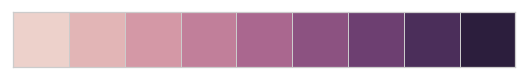

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.8888663743660877, 0.7106793139856472, 0.7158661451411206],
 [0.8314793143949643, 0.5987041921652179, 0.6530062709235388],
 [0.7588951019517731, 0.49817117746394224, 0.6058723814510268],
 [0.6672565752652589, 0.40671838146419587, 0.5620016466433286],
 [0.5529215689527474, 0.3217924564263954, 0.5093718054521851],
 [0.43082755198027817, 0.24984535814964698, 0.44393960899639856],
 [0.29794615023641036, 0.18145907625614888, 0.35317781405034754],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

In [954]:
sns.choose_cubehelix_palette()

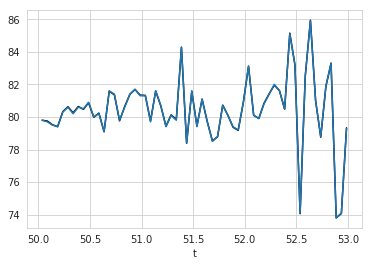

In [642]:
## plot full data traces
#df.gz.plot()
#df.gz.round(1).plot()

#df.gy.plot()
df.ax.plot(label = 'orig', color = 'k')
#df.ax.round(0).plot(label = 'round 0')
df.ax.round(1).plot(label = 'round 1')
#ax.legend()
#df.az_medfilt.plot()
#(200*df.button2).plot(color = 'k')

In [537]:
button_presses = np.where(df.button2.diff()>0)[0]
#df.ax_medfilt.cumsum().plot()

In [538]:
button_presses

array([1521, 5075, 8415])

In [72]:
#df_clip.resample(np.arange(0,df_clip.index.max(),0.005), axis=0)

In [102]:
df_clip = df.loc[10000:11000]

/home/asya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/asya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/asya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

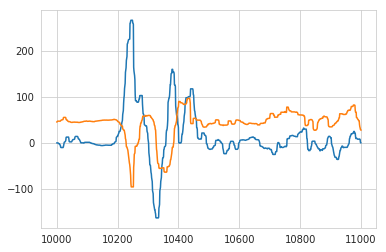

In [114]:
## plot clip


#df_clip.gz.plot()
df_clip.gz_medfilt.plot()
#df_clip.gz_medfilt.diff().plot()

#df_clip.ax_medfilt.plot()
#df_clip.ay_medfilt.plot()
df_clip.az_medfilt.plot()

#(100*df.loc[140:155].az).plot()
#(100*df.loc[140:155].ax).plot()
#(100*df.loc[140:155].ay).plot()

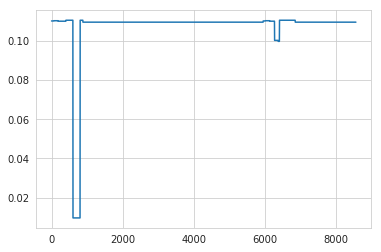

In [69]:
(df.t_button - round(df.t_button)).plot()

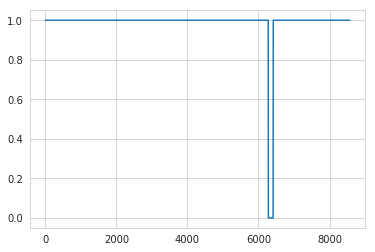

In [70]:
df.button2.plot()